# CSC 410 Assignment 3


In [1]:
#~/usr/bin/env python
from data import get_dataset
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import io, image
from tensorflow.keras.layers import Dense, Conv2D, Flatten,MaxPool2D, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from warnings import filterwarnings

### Artificial Neural Networks


Loading in the voting dataset and performing train, test split of 70/30.

In [2]:
dataset_directory = 'data'
voting_dataset = 'voting'
vt_schema, VTX, VTy = get_dataset(voting_dataset, dataset_directory)
VTX_train, VTX_test, VTy_train, VTy_test = train_test_split(VTX, VTy, test_size=0.3)

Generating the MLP model with one hidden layer and one neuron, followed by the model with one hidden layer and one hundred neurons.

In [3]:
oneNClf = MLPClassifier(hidden_layer_sizes =(1,)).fit(VTX_train, VTy_train)
oneHunNClf = MLPClassifier(hidden_layer_sizes =(100,)).fit(VTX_train, VTy_train)

C:\Users\lww11\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lww11\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Printing the accuracy scores of both created models.

In [4]:
oneNeur =  oneNClf.score(VTX_test, VTy_test)
oneHunNeur = oneHunNClf.score(VTX_test, VTy_test)
print("The accuracy for 1 neuron is", oneNeur)
print("The accuracy for 100 neurons is", oneHunNeur)

The accuracy for 1 neuron is 0.9090909090909091
The accuracy for 100 neurons is 0.9848484848484849


Creating the models with one hidden layer and one thousand neurons. One with the learning rate set to 0.1 and the other 0.001.

In [5]:
oneThouPOneNClf = MLPClassifier(hidden_layer_sizes =(1000,),learning_rate_init=0.1).fit(VTX_train, VTy_train)
oneThouPOOOneNClf = MLPClassifier(hidden_layer_sizes =(1000,),learning_rate_init=0.001).fit(VTX_train, VTy_train)

C:\Users\lww11\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Printing the accuracy scores of both created models.

In [6]:
oneThouPOne = oneThouPOneNClf.score(VTX_test, VTy_test)
oneThouPOOOne = oneThouPOOOneNClf.score(VTX_test, VTy_test)
print("The accuracy for 1000 neurons and a learning rate of 0.1 is", oneThouPOne)
print("The accuracy for 1000 neurons and a learning rate of 0.001 is", oneThouPOOOne)

The accuracy for 1000 neurons and a learning rate of 0.1 is 0.9772727272727273
The accuracy for 1000 neurons and a learning rate of 0.001 is 0.9848484848484849


This is a bar graph comparing the results of all four classifiers models.

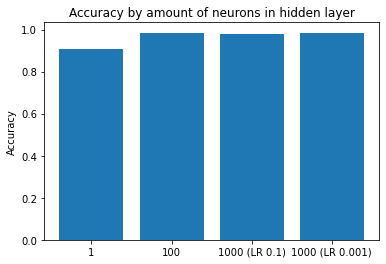

In [7]:
fig, ax = plt.subplots()
neurons = ['1', '100', '1000 (LR 0.1)', '1000 (LR 0.001)']
accuracy = [oneNeur,oneHunNeur,oneThouPOne,oneThouPOOOne]
bar_labels = ['red', 'blue', '_red', 'orange']
ax.bar(neurons, accuracy)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by amount of neurons in hidden layer')
plt.show()

### Convolutional Neural Networks


The provided code to import the images, generate convolutional layers, max pooling, and the measure the accuracy of the model.

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255) 
training_set = train_datagen.flow_from_directory("./data/images", target_size=(1024,1024), 
batch_size=1, class_mode="binary") 
 
model = Sequential() 
model.add(Conv2D(1,(3,3),input_shape=(1024,1024,3),activation="relu")) 
model.add(MaxPool2D(pool_size=(3,3) ) ) 
model.add(Flatten()) 
 
model.add(Dense(units=128,activation="relu" ) ) 
model.add(Dense(units=1,activation="sigmoid")) 
 
model.summary() 
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy']) 
 
model.fit_generator(training_set,epochs=2) 
test_loss, test_acc  = model.evaluate_generator(training_set) 
print("The first model's accuracy is",test_acc)

Found 10 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1022, 1022, 1)     28        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 340, 340, 1)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 115600)            0         
                                                                 
 dense (Dense)               (None, 128)               14796928  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,797,085
Trainable params: 14,797,085
Non-trainable params: 0
____

C:\Users\lww11\AppData\Local\Temp/ipykernel_17844/633062800.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_set,epochs=2)


10/10 [==============================] - 2s 172ms/step - loss: 69.1999 - accuracy: 0.7000
Epoch 2/2
10/10 [==============================] - 2s 168ms/step - loss: 10.7118 - accuracy: 0.4000


C:\Users\lww11\AppData\Local\Temp/ipykernel_17844/633062800.py:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc  = model.evaluate_generator(training_set)


The first model's accuracy is 0.4000000059604645


The same process with the addition of one more convolutional layer, a stride specification of (2,2) and an average pooling.

In [9]:
new_model = Sequential() 
new_model.add(Conv2D(1,(3,3),input_shape=(1024,1024,3),activation="relu")) 
new_model.add(MaxPool2D(pool_size=(3,3) ) ) 

new_model.add(Conv2D(1, (3, 3), input_shape=(1024,1024,3), strides = (2,2), activation="relu"))
new_model.add(AveragePooling2D(pool_size=(2,2)))

new_model.add(Flatten()) 
 
new_model.add(Dense(units=128,activation="relu" ) ) 
new_model.add(Dense(units=1,activation="sigmoid")) 
 
new_model.summary() 
new_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy']) 
 
new_model.fit_generator(training_set,epochs=2) 
new_test_loss, new_test_acc  = new_model.evaluate_generator(training_set) 
print("The new model's accuracy is",new_test_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1022, 1022, 1)     28        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 340, 340, 1)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 169, 169, 1)       10        
                                                                 
 average_pooling2d (AverageP  (None, 84, 84, 1)        0         
 ooling2D)                                                       
                                                                 
 flatten_1 (Flatten)         (None, 7056)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

C:\Users\lww11\AppData\Local\Temp/ipykernel_17844/583397984.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  new_model.fit_generator(training_set,epochs=2)


10/10 [==============================] - 2s 124ms/step - loss: 0.6757 - accuracy: 0.3000
Epoch 2/2
10/10 [==============================] - 1s 123ms/step - loss: 0.6206 - accuracy: 0.8000


C:\Users\lww11\AppData\Local\Temp/ipykernel_17844/583397984.py:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  new_test_loss, new_test_acc  = new_model.evaluate_generator(training_set)


The new model's accuracy is 0.800000011920929


Visualization of the kernel and filters. The conv2d layers are iterated through, the filter values are normalized, and finally all of the filters are displayed.

1


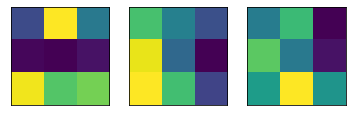

1


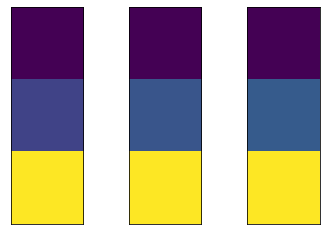

In [10]:
for layer in new_model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, j])
                filter_cnt+=1
    plt.show()

The image labeled img1 from the non-volcanoes/volcanoes dataset is loaded and resized.

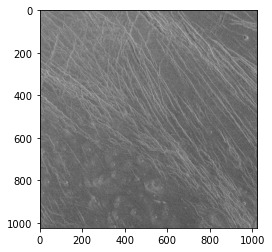

In [11]:
filterwarnings("ignore") 
tf_img = io.read_file("./data/images/non-volcanoes/img1.png")
tf_img = image.decode_png(tf_img, channels=3)
tf.image.resize(tf_img,[1024,1024])
plt.imshow(tf_img)


New model for img1 is created with one layer consisting of 64 filters with a 3x3 kernel. The model is then applied to img1.

In [12]:
featMapModel = Sequential()
featMapModel.add(Conv2D(64,(3,3),input_shape=(1024,1024,3))) 
featMap = featMapModel.predict(np.array([tf_img]))

1/1 [==============================] - 0s 141ms/step


The feature maps are displayed in 8 rows of 8.

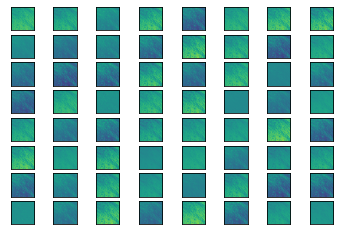

In [13]:
for i in range(64):
    featImg = featMap[0,:,:,i]
    ax = plt.subplot(8,8,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(featImg)
plt.show()